In [ ]:
# Author       : Utkarsh Kulshrestha
# E-Mail       : kuls.utkarsh1205@gmail.com
# Contact      : +91-8197094433
# Designation  : Artificial Intelligence Engineer

## Import the required libraries

In [134]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# from Sklearn.externals.six import StringIO     #--------------Doubt- This shows error
from IPython.display import Image  
from sklearn.tree import export_graphviz
# import pydotplus                               #--------------Doubt- This shows error


import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import time
import random
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from urllib.request import urlopen 

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 


## Read the Data from the CSV

In [135]:
dummy_df = pd.read_csv("C:/Users/Smrithi/Documents/Data_science/Learnbay_May/Statistics/Assignment_stats/Assignment_4/bank.csv", na_values =['NA'])
temp = dummy_df.columns.values
temp

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'deposit'],
      dtype=object)

In [136]:
dummy_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Data Pre-Processing

In [137]:
contact_df = dummy_df

# Data cleaning

In [138]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['job'] = le.fit_transform(res_df['job'])
    res_df['marital'] = le.fit_transform(res_df['marital'])
#     res_df['education'] = le.fit_transform(res_df['education'])
#     res_df['default'] = le.fit_transform(res_df['default'])
    res_df['housing'] = le.fit_transform(res_df['housing'])
    res_df['month'] = le.fit_transform(res_df['month'])
    res_df['loan'] = le.fit_transform(res_df['loan'])
#     res_df['contact'] = le.fit_transform(res_df['contact'])
    res_df['day_of_week'] = le.fit_transform(res_df['day'])
#     res_df['poutcome'] = le.fit_transform(res_df['poutcome'])
    res_df['deposit'] = le.fit_transform(res_df['deposit'])
    return res_df

# Correlation

In [139]:
def corr_calc(df):
    df = pd.read_csv(df)
    corrmat=df.corr()
    print(corrmat)
    print('\n\n\n Triangular matrix \n\n\n')
    upper_tri=corrmat.where(np.triu(np.ones(corrmat.shape),k=1).astype(np.bool))
    print(upper_tri)
    to_drop=[column for column in upper_tri.columns if any (upper_tri[column]>0.75)]
    print()
    print ("Below are to drop columns")
    print (to_drop)
   
#     to_retain=[col for col in upper_tri.columns if any (upper_tri[col]<0.75)] ###Doubt###-Why this code is also showing the dropped columns?
#     print (f'{to_drop} are non - important variables') 
#     print (f'{to_retain} are important variables')   
        
    

In [140]:

filename=eval(input("Enter file path: "))
corr_calc(filename)

# 'C:/Users/Smrithi/Documents/Data_science/Learnbay_May/Statistics/Assignment_stats/Assignment_4/bank.csv'

Enter file path: 'C:/Users/Smrithi/Documents/Data_science/Learnbay_May/Statistics/Assignment_stats/Assignment_4/bank.csv'
               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.112300 -0.000762  0.000189 -0.005278  0.002774  0.020169
balance   0.112300  1.000000  0.010467  0.022436 -0.013894  0.017411  0.030805
day      -0.000762  0.010467  1.000000 -0.018511  0.137007 -0.077232 -0.058981
duration  0.000189  0.022436 -0.018511  1.000000 -0.041557 -0.027392 -0.026716
campaign -0.005278 -0.013894  0.137007 -0.041557  1.000000 -0.102726 -0.049699
pdays     0.002774  0.017411 -0.077232 -0.027392 -0.102726  1.000000  0.507272
previous  0.020169  0.030805 -0.058981 -0.026716 -0.049699  0.507272  1.000000



 Triangular matrix 



          age  balance       day  duration  campaign     pdays  previous
age       NaN   0.1123 -0.000762  0.000189 -0.005278  0.002774  0.020169
balance   NaN      NaN  0.010467  0.022436 -0.013894  0.017411  0.030805
d

# Null values

In [141]:
contact_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# Redundancy

In [142]:
contact_df=contact_df.drop(['contact','poutcome','pdays', 'education','default','campaign'],axis=1)
contact_df

,age,job,marital,balance,housing,loan,day,month,duration,previous,deposit
0,59,admin.,married,2343,yes,no,5,may,1042,0,yes
1,56,admin.,married,45,no,no,5,may,1467,0,yes
2,41,technician,married,1270,yes,no,5,may,1389,0,yes
3,55,services,married,2476,yes,no,5,may,579,0,yes
4,54,admin.,married,184,no,no,5,may,673,0,yes
...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,1,yes,no,20,apr,257,0,no
11158,39,services,married,733,no,no,16,jun,83,0,no
11159,32,technician,single,29,no,no,19,aug,156,0,no
11160,43,technician,married,0,no,yes,8,may,9,5,no


# Outlier removal   #----Doubt how to use loop

In [143]:
contact_df

,age,job,marital,balance,housing,loan,day,month,duration,previous,deposit
0,59,admin.,married,2343,yes,no,5,may,1042,0,yes
1,56,admin.,married,45,no,no,5,may,1467,0,yes
2,41,technician,married,1270,yes,no,5,may,1389,0,yes
3,55,services,married,2476,yes,no,5,may,579,0,yes
4,54,admin.,married,184,no,no,5,may,673,0,yes
...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,1,yes,no,20,apr,257,0,no
11158,39,services,married,733,no,no,16,jun,83,0,no
11159,32,technician,single,29,no,no,19,aug,156,0,no
11160,43,technician,married,0,no,yes,8,may,9,5,no


In [144]:
contact_df.describe() #Doubt- Is there a way to find which all are the columns without categorical data apart from describe?

,age,balance,day,duration,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,58.000000


<AxesSubplot:xlabel='age', ylabel='Density'>

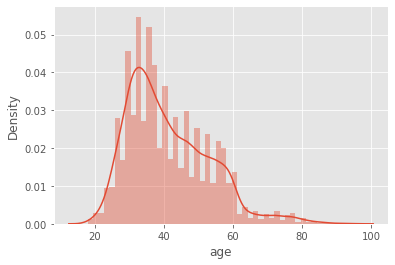

In [145]:
sns.distplot(contact_df['age'])

<AxesSubplot:xlabel='age'>

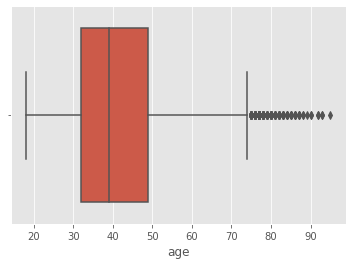

In [146]:
sns.boxplot(contact_df['age'])

In [147]:
# Limits
upper_limit=contact_df['age'].mean()+3*contact_df['age'].std()
lower_limit=contact_df['age'].mean()-3*contact_df['age'].std()
print('Upper limit', upper_limit)
print('Lower limit', lower_limit)

Upper limit 76.97205525627365
Lower limit 5.491840102980966


In [148]:
# Finding outliers

contact_df.loc[(contact_df['age']>upper_limit)|(contact_df['age']<lower_limit)]

,age,job,marital,balance,housing,loan,day,month,duration,previous,deposit
1236,85,retired,married,12114,no,no,12,feb,165,0,yes
1243,90,retired,divorced,1,no,no,13,feb,152,0,yes
1274,85,retired,divorced,7613,no,no,18,feb,355,0,yes
1320,83,retired,divorced,1097,no,no,5,mar,181,0,yes
1373,83,retired,divorced,46,no,no,25,mar,115,0,yes
...,...,...,...,...,...,...,...,...,...,...,...
10438,77,retired,married,1492,no,no,1,sep,663,2,no
10562,88,retired,married,648,no,no,3,sep,318,0,no
10570,77,unknown,married,397,no,no,8,nov,207,3,no
10618,78,retired,married,680,no,no,24,may,838,9,no


In [ ]:
# Trimming

In [40]:
# new_df=contact_df.loc[(contact_df['age']<upper_limit)&(contact_df['age']>lower_limit)]
# print('new:',len(new_df))
# print('old:',len(contact_df))


In [41]:
# print ('outliers:',len(contact_df)-len(new_df))

In [42]:
# sns.boxplot(new_df['age'])

In [ ]:
# Capping

In [43]:
# new_df=contact_df.copy()

In [149]:
contact_df.loc[contact_df['age']>upper_limit, 'age']=upper_limit
contact_df.loc[contact_df['age']<lower_limit, 'age']=lower_limit

<AxesSubplot:xlabel='age'>

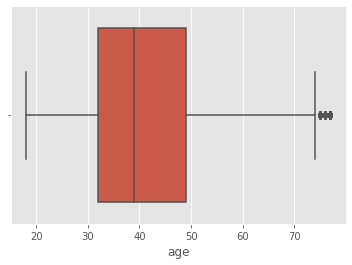

In [150]:
sns.boxplot(contact_df['age'])

In [ ]:
# Balance

<AxesSubplot:xlabel='balance', ylabel='Density'>

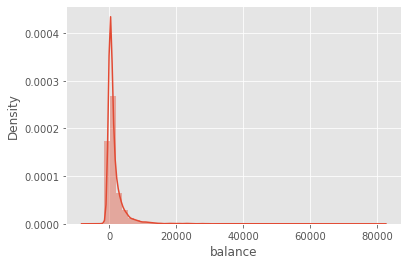

In [153]:
sns.distplot(contact_df['balance'])

<AxesSubplot:xlabel='balance'>

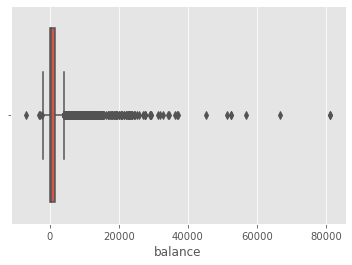

In [154]:
sns.boxplot(contact_df['balance'])

In [155]:
# Limits
upper_limit_b=contact_df['balance'].mean()+3*contact_df['balance'].std()
lower_limit_b=contact_df['balance'].mean()-3*contact_df['balance'].std()
print('Upper limit', upper_limit_b)
print('Lower limit', lower_limit_b)

Upper limit 11204.778501400662
Lower limit -8147.701454276492


In [156]:
# Outliers
contact_df.loc[(contact_df['balance']>upper_limit_b)|(contact_df['balance']<lower_limit_b)]

,age,job,marital,balance,housing,loan,day,month,duration,previous,deposit
170,27.0,management,single,12956,yes,no,29,may,789,0,yes
185,46.0,management,divorced,14481,yes,no,30,may,1269,0,yes
692,42.0,technician,married,14282,yes,no,6,aug,649,0,yes
771,32.0,technician,single,34646,no,no,13,aug,618,0,yes
861,60.0,unknown,married,17297,no,no,26,aug,664,0,yes
...,...,...,...,...,...,...,...,...,...,...,...
10827,55.0,management,married,13578,no,no,29,oct,247,0,no
10845,31.0,management,married,22867,yes,no,27,may,241,0,no
10927,31.0,technician,single,31868,no,no,14,aug,34,0,no
10983,53.0,management,married,20772,no,no,4,feb,715,0,no


<AxesSubplot:xlabel='balance'>

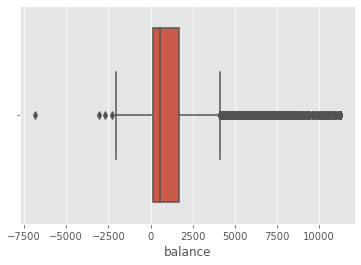

In [157]:
# capping
# new_df_b=contact_df.copy()
contact_df.loc[contact_df['balance']>upper_limit_b, 'balance']=upper_limit_b
contact_df.loc[contact_df['balance']<lower_limit_b, 'balance']=lower_limit_b
sns.boxplot(contact_df['balance'])

In [ ]:
# Doubt --- Will capping not create biasness in interpreting the data? will trimming lead to data loss?

In [ ]:
# Day

<AxesSubplot:xlabel='day'>

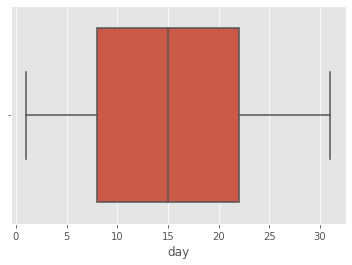

In [158]:
sns.boxplot(contact_df['day'])

In [ ]:
# Duration

<AxesSubplot:xlabel='duration'>

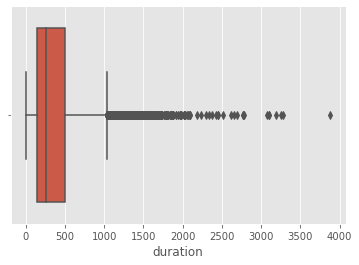

In [159]:
sns.boxplot(contact_df['duration'])

In [160]:
# Limits
upper_limit_d=contact_df['duration'].mean()+3*contact_df['duration'].std()
lower_limit_d=contact_df['duration'].mean()-3*contact_df['duration'].std()
print('Upper limit', upper_limit_d)
print('Lower limit', lower_limit_d)

Upper limit 1413.3789754610511
Lower limit -669.3913388367904


In [161]:
# Outliers
contact_df.loc[(contact_df['duration']>upper_limit_d)|(contact_df['duration']<lower_limit_d)]

,age,job,marital,balance,housing,loan,day,month,duration,previous,deposit
1,56.000000,admin.,married,45.0,no,no,5,may,1467,0,yes
11,30.000000,blue-collar,married,309.0,yes,no,7,may,1574,0,yes
12,29.000000,management,married,199.0,yes,yes,7,may,1689,0,yes
22,43.000000,management,divorced,388.0,yes,no,8,may,2087,0,yes
33,40.000000,blue-collar,married,10.0,yes,no,9,may,1692,0,yes
...,...,...,...,...,...,...,...,...,...,...,...
9364,47.000000,management,married,2475.0,yes,no,20,nov,1476,0,no
9430,76.972055,retired,married,553.0,no,no,19,aug,2027,0,no
10401,38.000000,blue-collar,married,376.0,yes,no,7,may,1521,0,no
10647,31.000000,technician,single,433.0,no,no,11,aug,1504,0,no


<AxesSubplot:xlabel='duration'>

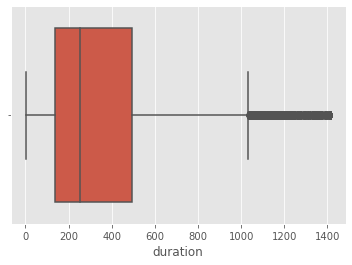

In [162]:
# capping
# new_df_d=contact_df.copy()
contact_df.loc[contact_df['duration']>upper_limit_d, 'duration']=upper_limit_d
contact_df.loc[contact_df['duration']<lower_limit_d, 'duration']=lower_limit_d
sns.boxplot(contact_df['duration'])

In [ ]:
# previous

<AxesSubplot:xlabel='previous', ylabel='Density'>

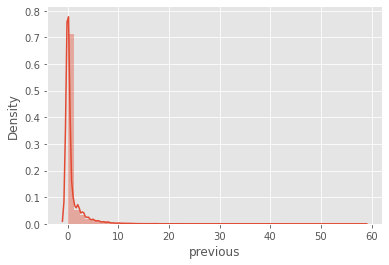

In [163]:
sns.distplot(contact_df['previous'])

<AxesSubplot:xlabel='previous'>

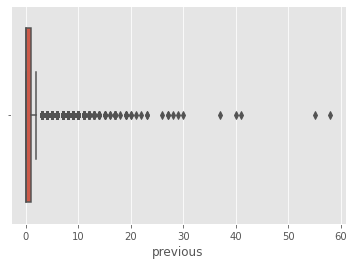

In [164]:
sns.boxplot(contact_df['previous'])

In [165]:
# Limits
upper_limit_p=contact_df['previous'].mean()+3*contact_df['previous'].std()
lower_limit_p=contact_df['previous'].mean()-3*contact_df['previous'].std()
print('Upper limit', upper_limit_p)
print('Lower limit', lower_limit_p)

Upper limit 7.7085785454572555
Lower limit -6.043464766564584


In [166]:
# Outliers
contact_df.loc[(contact_df['previous']>upper_limit_p)|(contact_df['previous']<lower_limit_p)]

,age,job,marital,balance,housing,loan,day,month,duration,previous,deposit
1007,33.0,technician,married,6843.0,no,no,20,nov,755.000000,10,yes
1062,31.0,management,married,4148.0,yes,no,21,nov,316.000000,9,yes
1185,26.0,entrepreneur,single,725.0,no,no,5,feb,1413.378975,29,yes
1383,46.0,admin.,married,-522.0,yes,no,27,mar,243.000000,13,yes
1408,33.0,technician,single,127.0,yes,no,6,apr,583.000000,17,yes
...,...,...,...,...,...,...,...,...,...,...,...
10817,30.0,self-employed,married,163.0,yes,no,18,may,149.000000,8,no
10822,59.0,management,married,287.0,yes,no,20,apr,818.000000,8,no
10967,46.0,blue-collar,married,1291.0,yes,no,14,may,142.000000,17,no
11007,31.0,admin.,single,690.0,no,no,4,may,10.000000,12,no


<AxesSubplot:xlabel='previous'>

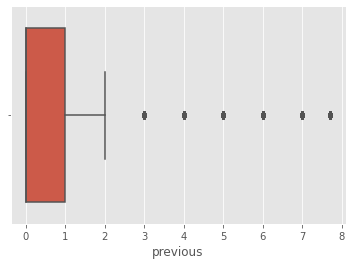

In [167]:
# capping
# new_df_p=contact_df.copy()
contact_df.loc[contact_df['previous']>upper_limit_p, 'previous']=upper_limit_p
contact_df.loc[contact_df['previous']<lower_limit_p, 'previous']=lower_limit_p
sns.boxplot(contact_df['previous'])

In [168]:
contact_df.describe()

,age,balance,day,duration,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.185210,1401.077287,15.658036,365.762693,0.745018
std,11.755966,2208.109129,8.420740,319.805008,1.652159
min,18.000000,-6847.000000,1.000000,2.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,1.000000
max,76.972055,11204.778501,31.000000,1413.378975,7.708579


<AxesSubplot:xlabel='balance'>

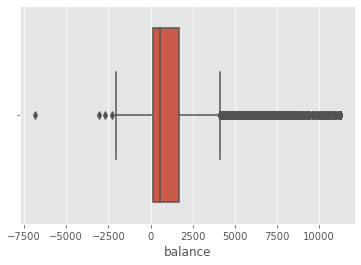

In [169]:
sns.boxplot(contact_df['balance'])

<AxesSubplot:xlabel='day'>

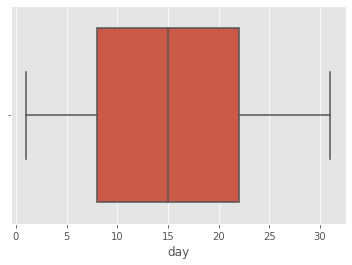

In [170]:
sns.boxplot(contact_df['day']) 

<AxesSubplot:xlabel='duration'>

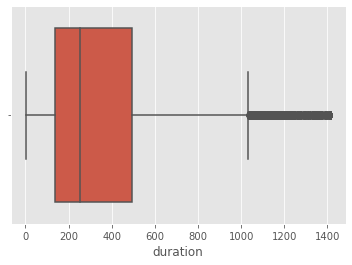

In [171]:
sns.boxplot(contact_df['duration']) 

<AxesSubplot:xlabel='previous'>

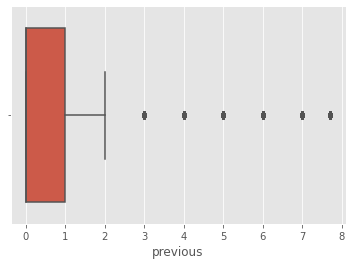

In [172]:
sns.boxplot(contact_df['previous']) 

In [173]:
print("Highest allowed",contact_df['age'].mean() + 3*contact_df['age'].std())
print("Lowest allowed",contact_df['age'].mean() - 3*contact_df['age'].std())

Highest allowed 76.45310646277642
Lowest allowed 5.917313048749847


In [174]:
print("Highest allowed",contact_df['balance'].mean() + 3*contact_df['balance'].std())
print("Lowest allowed",contact_df['balance'].mean() - 3*contact_df['balance'].std())

Highest allowed 8025.404674625028
Lowest allowed -5223.250100042995


In [175]:
print("Highest allowed",contact_df['duration'].mean() + 3*contact_df['duration'].std())
print("Lowest allowed",contact_df['duration'].mean() - 3*contact_df['duration'].std())

Highest allowed 1325.1777153042765
Lowest allowed -593.652330235708


In [176]:
print("Highest allowed",contact_df['previous'].mean() + 3*contact_df['previous'].std())
print("Lowest allowed",contact_df['previous'].mean() - 3*contact_df['previous'].std())

Highest allowed 5.70149499965097
Lowest allowed -4.211459651147008


In [177]:
contact_df[(contact_df['age'] > 76.97) | (contact_df['age'] < 5.49)]


,age,job,marital,balance,housing,loan,day,month,duration,previous,deposit
1236,76.972055,retired,married,11204.778501,no,no,12,feb,165.0,0.000000,yes
1243,76.972055,retired,divorced,1.000000,no,no,13,feb,152.0,0.000000,yes
1274,76.972055,retired,divorced,7613.000000,no,no,18,feb,355.0,0.000000,yes
1320,76.972055,retired,divorced,1097.000000,no,no,5,mar,181.0,0.000000,yes
1373,76.972055,retired,divorced,46.000000,no,no,25,mar,115.0,0.000000,yes
...,...,...,...,...,...,...,...,...,...,...,...
10438,76.972055,retired,married,1492.000000,no,no,1,sep,663.0,2.000000,no
10562,76.972055,retired,married,648.000000,no,no,3,sep,318.0,0.000000,no
10570,76.972055,unknown,married,397.000000,no,no,8,nov,207.0,3.000000,no
10618,76.972055,retired,married,680.000000,no,no,24,may,838.0,7.708579,no


In [178]:
new_df = contact_df[(contact_df['age'] > 76.97) | (contact_df['age'] < 5.49)]
new_df

,age,job,marital,balance,housing,loan,day,month,duration,previous,deposit
1236,76.972055,retired,married,11204.778501,no,no,12,feb,165.0,0.000000,yes
1243,76.972055,retired,divorced,1.000000,no,no,13,feb,152.0,0.000000,yes
1274,76.972055,retired,divorced,7613.000000,no,no,18,feb,355.0,0.000000,yes
1320,76.972055,retired,divorced,1097.000000,no,no,5,mar,181.0,0.000000,yes
1373,76.972055,retired,divorced,46.000000,no,no,25,mar,115.0,0.000000,yes
...,...,...,...,...,...,...,...,...,...,...,...
10438,76.972055,retired,married,1492.000000,no,no,1,sep,663.0,2.000000,no
10562,76.972055,retired,married,648.000000,no,no,3,sep,318.0,0.000000,no
10570,76.972055,unknown,married,397.000000,no,no,8,nov,207.0,3.000000,no
10618,76.972055,retired,married,680.000000,no,no,24,may,838.0,7.708579,no


In [179]:
upper_limit = contact_df['age'].mean() + 3*contact_df['age'].std()
lower_limit = contact_df['age'].mean() - 3*contact_df['age'].std()

In [180]:
contact_df['age'] = np.where(
    contact_df['age']>upper_limit,
    upper_limit,
    np.where(
        contact_df['age']<lower_limit,
        lower_limit,
        contact_df['age']
    )
)

In [181]:
contact_df['age'].describe()

count    11162.000000
mean        41.179073
std         11.737401
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max         76.453106
Name: age, dtype: float64

<AxesSubplot:xlabel='age'>

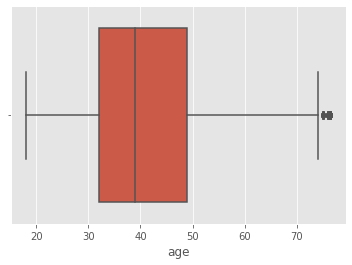

In [182]:
sns.boxplot(contact_df['age'])

In [183]:
encoded_df = preprocessor(contact_df)

x = encoded_df.drop(['deposit'],axis =1).values
y = encoded_df['deposit'].values

## Split the data into Train-Test

In [184]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2)

## Build the Decision Tree Model

In [185]:
# Decision tree with depth = 2
model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=2)
model_dt_2.fit(x_train, y_train)
model_dt_2_score_train = model_dt_2.score(x_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)
#y_pred_dt = model_dt_2.predict_proba(x_test)[:, 1]

Training score:  0.7146376973905253
Testing score:  0.6950291088222122


In [186]:
# Decision tree with depth = 4
model_dt_4 = DecisionTreeClassifier(random_state=1, max_depth=4)
model_dt_4.fit(x_train, y_train)
model_dt_4_score_train = model_dt_4.score(x_train, y_train)
print("Training score: ",model_dt_4_score_train)
model_dt_4_score_test = model_dt_4.score(x_test, y_test)
print("Testing score: ",model_dt_4_score_test)


Training score:  0.7886661440250868
Testing score:  0.7796686072548141


In [187]:
# Decision tree with depth = 8
model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=8, criterion = "gini")
model_dt_8.fit(x_train, y_train)
model_dt_8_score_train = model_dt_8.score(x_train, y_train)
print("Training score: ",model_dt_8_score_train)
model_dt_8_score_test = model_dt_8.score(x_test, y_test)
print("Testing score: ",model_dt_8_score_test)

Training score:  0.8474633217605555
Testing score:  0.7948947604120018


In [188]:
#Decision tree

model_dt = DecisionTreeClassifier(max_depth = 8, criterion ="entropy")
model_dt.fit(x_train, y_train)
y_pred_dt = model_dt.predict_proba(x_test)[:, 1]

# Assignment part 1 solution

In [189]:
# Decision tree with depth = 20
model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=20, min_samples_split=10, min_samples_leaf=15, criterion = "gini")
model_dt_8.fit(x_train, y_train)
model_dt_8_score_train = model_dt_8.score(x_train, y_train)
print("Training score: ",model_dt_8_score_train)
model_dt_8_score_test = model_dt_8.score(x_test, y_test)
print("Testing score: ",model_dt_8_score_test)

Training score:  0.8531750475977153
Testing score:  0.7926556202418271


In [190]:
# Decision tree with depth = 6
model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=6, min_samples_split=5, min_samples_leaf=20, criterion = "entropy")
model_dt_8.fit(x_train, y_train)
model_dt_8_score_train = model_dt_8.score(x_train, y_train)
print("Training score: ",model_dt_8_score_train)
model_dt_8_score_test = model_dt_8.score(x_test, y_test)
print("Testing score: ",model_dt_8_score_test)

Training score:  0.8009855526934707
Testing score:  0.7774294670846394


# Random forest classifier

In [191]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=42)

## Grid Search CV implementation in DT

In [192]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [6, 4, 8],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy'],
              'min_samples_split':[5,10,15,20],
              'min_samples_leaf':[30,25,20]
             }

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 7)

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 20, 'min_samples_split': 5}
Time taken in grid search:  1096.26


## Performance Metrics

In [104]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [105]:
predictions = model_dt.predict(x_test)
predictions

array([1, 0, 1, ..., 1, 0, 0])

In [106]:
for i in range(len(predictions)):
    if(predictions[i] == 1):
        y_actual_result = np.vstack((y_actual_result, y_test[i]))

NameError: name 'y_actual_result' is not defined

## Recall

In [108]:
#Recall
y_actual_result = y_actual_result.flatten()
count = 0
for result in y_actual_result:
     if(result == 1):
        count=count+1

print ("true yes|predicted yes:")
print (count/float(len(y_actual_result)))

NameError: name 'y_actual_result' is not defined

## Area Under the Curve

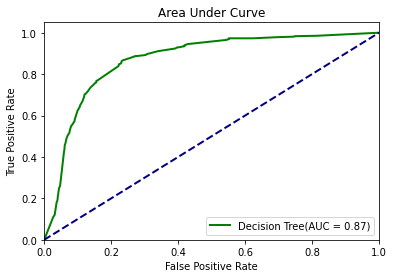

In [110]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

## Confusion Matrix

In [112]:
print (confusion_matrix(y_test, predictions))

[[977 180]
 [258 818]]


In [113]:
accuracy_score(y_test, predictions)

0.8038513210927004

In [115]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

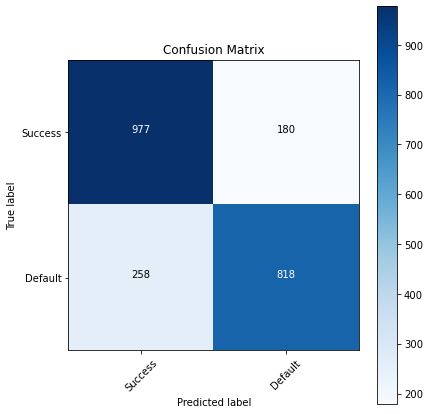

In [116]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()